In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

每年最受欢迎的电影类别是哪些？票房高的电影有哪些特点？

In [2]:
# 载入数据
df_movies = pd.read_csv('tmdb-movies.csv')

In [3]:
# 查看前五行数据
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# 查看数据信息，包括每列的数据类型以及不为空的列数
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


|         列名         | 非空数量 | 数据类型 |           含义           |
| :------------------: | :------: | :------: | :----------------------: |
|          id          |  10865   |  int64   |           编号           |
|       imdb_id        |  10855   |  object  |         IMDB编号         |
|      popularity      |  10865   | float64  |         欢迎程度         |
|        budget        |  10865   |  int64   |         制作成本         |
|       revenue        |  10865   |  int64   |          总票房          |
|    original_title    |  10865   |  object  |           片名           |
|         cast         |  10789   |  object  |         主要演员         |
|       homepage       |   2936   |  object  |           官网           |
|       director       |  10821   |  object  |           导演           |
|       tagline        |   8041   |  object  |          宣传语          |
|       keywords       |   9372   |  object  |          关键词          |
|       overview       |  10861   |  object  |         剧情摘要         |
|       runtime        |  10865   |  int64   |         电影时长         |
|        genres        |  10842   |  object  |         电影类型         |
| production_companies |   9835   |  object  |         制片公司         |
|     release_date     |  10865   |  object  |         上映日期         |
|      vote_count      |  10865   |  int64   |         评价次数         |
|     vote_average     |  10865   | float64  |         平均评分         |
|     release_year     |  10865   |  int64   |         上映年份         |
|      budget_adj      |  10865   | float64  | 计算通货膨胀率的制作成本 |
|     revenue_adj      |  10865   | float64  |  计算通货膨胀率的总票房  |


In [5]:
# 查询该数据集一共多少行，多少列
df_movies.shape

(10866, 21)

In [6]:
# 查询冗余行
sum(df_movies.duplicated())

1

In [7]:
# 删除冗余行
df_movies.drop_duplicates(inplace=True)

In [8]:
# 再次查询冗余行是否删除
sum(df_movies.duplicated())

0

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [48]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
# 填充空值
df_movies.fillna(np.NaN, inplace=True)

欢迎程度是否和平均评分有相关性

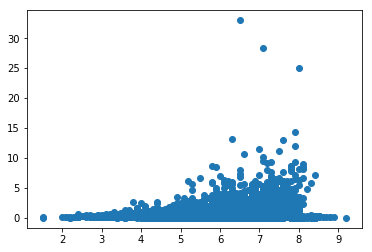

In [17]:
plt.scatter(df_movies.vote_average, df_movies.popularity);

In [47]:
df_movies.corr().popularity.vote_average

0.20951701409661877

从散点图看无相关性

In [28]:
df_movies.groupby('release_year').budget.sum().values

array([  22056948,   46137000,   54722126,   73331500,   39483161,
         70205115,   57554800,  100652200,   71939000,   42129087,
        126966946,   75997000,   36279254,   65190783,   76970000,
         56279000,  122150000,  161580000,  208997011,  254814000,
        362500000,  373757786,  437795002,  519107412,  729211964,
        748720637,  704533613,  709455811,  925348000, 1079656360,
       1289922066, 1466233000, 1441765370, 1779628653, 2229207032,
       2865884377, 3687042051, 4751086675, 4499660000, 5765235106,
       5752700000, 5641944000, 5894640255, 6239857694, 7170340222,
       7343284349, 7306185300, 7635569004, 7781262597, 8594084056,
       9355001006, 9018153652, 8274084052, 9236038361, 7923990138,
       7596547557], dtype=int64)

每年电影票房的情况

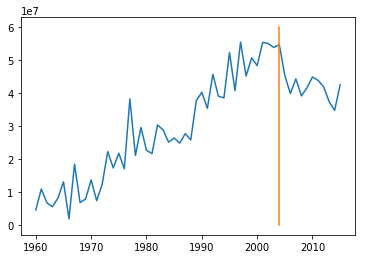

In [44]:
plt.plot(df_movies.groupby('release_year').revenue.mean().index, df_movies.groupby('release_year').revenue.mean().values)
plt.plot([2004, 2004], [0,60000000]);